In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wine Wrangling 
#
##########################################################################################


In [2]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_Wine_Wrangling_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub pull request
#
##################################################################################################################


In [3]:
# Standard imports
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook
import numpy as np
# Import to do a regex match
import re

## Fetch the data

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/

You'll need to fetch both wine.data and wine.names

## Build a  list of field names


In [4]:

##################################################################################################################
#
# YouDo:
#    1) Read (with your eyes--not code) the wine.names file and 
#    2) inspect wine.data for structure 
#    3) Review the features of python strings with particular attention to triple-quoted strings:
#         https://docs.python.org/3/tutorial/introduction.html#strings
#
##################################################################################################################
#
# Notice that in wine.names, there's a list of column names in nicely human-readable format.   
# Also notice that wine.data doesn't have a header row
#
# In python, it's pretty easy to take that list of column names and make it usable in our code.
# You could, of course, hand type it, but that's not a scalable solution.
#
#The list looks like this:
#
#	1) Alcohol
# 	2) Malic acid
# 	3) Ash
#	4) Alcalinity of ash  
# ...


# Using a simple cut & paste, I've grabbed the list and made it into a triple-quoted string.


In [5]:
colnames = """
	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline """
    
##################################################################################################################
#
# YouDo:
#    1) Convert the given triple-quoted string colnames into a list of field names.   
#        a) Ensure that the list has 13 elements
#        b) Ensure each entry has no space characters--replace with underscores
#        c) It should look like this:
#            col_name_list = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', ...
#
#  Hint:  My solution made great use of the string methods:
#       .strip()
# and   .replace()


#  1)
#######################################  BEGIN STUDENT CODE  #####################################################

fixed_colnames = [name.replace(" ","_") for name in re.findall("^\s+[0-9]+\)\s*(.*[^\s])\s*$",colnames,flags=re.MULTILINE)]

#######################################   END STUDENT CODE   #####################################################

## Instructor comment:
## Wow.  Right to the regex--that's sort of the nuclear option :)



In [6]:
fixed_colnames

['Alcohol',
 'Malic_acid',
 'Ash',
 'Alcalinity_of_ash',
 'Magnesium',
 'Total_phenols',
 'Flavanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280/OD315_of_diluted_wines',
 'Proline']

# Read wine.data into a data frame

In [7]:
#################################################################################################################
#
# YouDo:
#    1) read the data into a dataframe called df
#       a) Ensure that you don't read the first row of data as the header
#           (check the help file: help(pd.read_csv) under "header")
#       b) df should have the shape 178 rows by 14 columns
#
#
#################################################################################################################

# 1) 
#######################################  BEGIN STUDENT CODE  #####################################################

df = pd.read_csv("wine.data",header=None)

#######################################   END STUDENT CODE   #####################################################



In [8]:
df.shape

(178, 14)

## Add column names to the df

In [9]:
#################################################################################################################
#
# YouDo:
#    1) Add column names to the df
#       Note:  There are 13 column names in our list but 14 in the data
#              A careful reading of wine.names will give you the final column name
#  

#######################################  BEGIN STUDENT CODE  #####################################################

df.columns = ["Class"] + fixed_colnames
#######################################   END STUDENT CODE   #####################################################



## An example analysis:  Principal Components Analysis

In [10]:
# adapted from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df.columns[1:] # Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,'Class'].values# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf['Category'] = y

Text(0, 0.5, 'Second Principle Component')

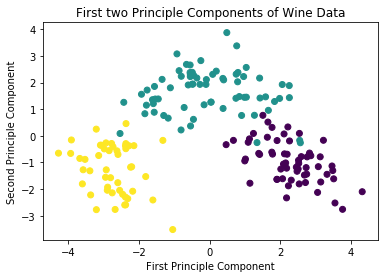

In [11]:
# Make a scatter plot of the principal components of wines--dots colored by "Class" 
fig, ax = plt.subplots()

thisclass = principalDf
ax.scatter(thisclass.PC1, thisclass.PC2, c=thisclass.Category)

plt.title('First two Principle Components of Wine Data')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')


In [12]:
# Explained variance
print('Explained Variance: {}'.format(pca.explained_variance_ratio_))


Explained Variance: [0.36198848 0.1920749 ]


In [13]:
# PCA Loading scores
pd.DataFrame(pca.components_.T, index=fixed_colnames, columns=['PC1', 'PC2'] )

,PC1,PC2
Alcohol,0.144329,-0.483652
Malic_acid,-0.245188,-0.224931
Ash,-0.002051,-0.316069
Alcalinity_of_ash,-0.239320,0.010591
Magnesium,0.141992,-0.299634
Total_phenols,0.394661,-0.065040
Flavanoids,0.422934,0.003360
Nonflavanoid_phenols,-0.298533,-0.028779
Proanthocyanins,0.313429,-0.039302
Color_intensity,-0.088617,-0.529996


In [14]:

##################################################################################################################
#
# YouDo:
#    1) Ensure your file is called BIOS6644_Wine_Wrangling_FirstLast
#    2) Submit via pull-request
#
##################################################################################################################
